# Undestanding SHA-256 from First Principles

This is a project where we're going to figure out, from scratch, how to build the SHA-256 algorithm, which is a one-way cryptographic function, converting any input, such as `Hi!`, into the 256-bit (32-bye) hash: `ca51ce1fb15acc6d69b8a5700256172fcc507e02073e6f19592e341bd6508ab8`.

**NOTE:** This is a beginner-friendly tutorial where I'm assuming you have _some_ Python experience, but are unfamiliar with some funtions which I will xplain on the way.

### Input and Output

During this tutorial, we're going to use `Hi!` as the input message, but you can make it anything you want.

In [1]:
sha_256_input = r"Hi!"

#### SHA-256: The _EASY_ Way.

The easiest way to get the SHA-256 Hash is to use `hashlib`.

In [2]:
import hashlib

def quick_sha256(text):
    return hashlib.sha256(text.encode('utf-8')).hexdigest()

correct_sha_256_output_hash = quick_sha256(sha_256_input)

print(f"SHA-256 INPUT: {sha_256_input}")
print("\nIf our algorithm is correct, this should be the output hash:\n")
print(f"SHA-256 OUTPUT: {correct_sha_256_output_hash}")


SHA-256 INPUT: Hi!

If our algorithm is correct, this should be the output hash:

SHA-256 OUTPUT: ca51ce1fb15acc6d69b8a5700256172fcc507e02073e6f19592e341bd6508ab8


## Step 1: Convert Input to Binary

...But, we're masochists who want to understand this at a deep level, so we're gonna do this step-by-step. And the tThe first thing we need to do is convert each of the characters in the text `Hi!` to `ASCII` then `8-bit binary` and combine those numbers into a single string. Like this:
- `H` -> `72` -> `01001000` 
- `i` -> `105` -> `01101001`
- `!` -> `33` -> `00100001`

Combining the three, we get our output binary string:

`01001000` + `01101001` + `00100001` ➡ `010010000110100100100001`

#### `ord()`

We're going to need some lesser known functions, and the first one is `ord()` converts **ONE** character into its ascii equivalent.

In [3]:
print('H', ord('H'))
print('i', ord('i'))
print('!', ord('!'))

H 72
i 105
! 33


Let's do this for the entire message.

In [4]:
for char in sha_256_input:
    print(f'{char} -> {ord(char)}')

H -> 72
i -> 105
! -> 33


#### `bin()`
We also have `bin()` which converts an integer into its binary equivalent.

In [5]:
print(bin(1), bin(2), bin(3), bin(4), bin(5))


0b1 0b10 0b11 0b100 0b101


Notice how
1. The output is a string, meaning we can't do any math on it.
2. The string starts with the '0b' prefix, which is no good.
3. For SHA-256, the output must be exactly 8-bits. No more, no less.

In [6]:
print('H', bin(ord('H')))
print(f"String Length: {len(bin(ord('H')))}")


H 0b1001000
String Length: 9


But this is what it looks like when we convert the message.

In [7]:
for char in sha_256_input:
    ascii_val = ord(char)
    binary_val = bin(ascii_val)
    print(f'{char} -> {ascii_val} -> {binary_val}')

H -> 72 -> 0b1001000
i -> 105 -> 0b1101001
! -> 33 -> 0b100001


#### `format()`
So what we're going to use instead is `format()` which allows us to convert the ascii to binary and add zeros to the left to make it exactly 8 bits.

`H` ➡ `72` ➡ `1001000` ➡ `01001000` (add zero to left to make 8 bits)

In [8]:
char = 'H'
ascii_val = ord(char)

# format() works with ascii values
# '0' means fill with zeros, '8' means 8 bits, 'b' means binary
binary_val = format(ascii_val, '08b')
print(f"{char} -> {ascii_val} -> {binary_val} (length: {len(binary_val)})")

H -> 72 -> 01001000 (length: 8)


### Combining the Binary Strings
Now that we know how to convert characters into 8-bit binary, we're going to put it all together to create our binary message, which comes out as a *STRING*.

In [9]:
binary_message = ''

for char in sha_256_input:
    ascii_val = ord(char)
    for bit in format(ascii_val, '08b'):
        binary_message += bit

print(binary_message, type(binary_message))

010010000110100100100001 <class 'str'>


A more elegant way to write it with `join()` which iterates through every `char` of the input message, converts it to ascii, then binary, then squishes them all into one string.

In [10]:
binary_message = ''.join(format(ord(char), '08b') for char in sha_256_input)

#### `text_to_binary()`
Let's abstract this and turn it into a function.

In [11]:
def text_to_binary(input_text):
    return ''.join(format(ord(char), '08b') for char in input_text)

binary_message = text_to_binary(sha_256_input)
print(binary_message, type(binary_message))

010010000110100100100001 <class 'str'>


## Step 2: Padding the Binary Message

### Recap
Step 1 was turning the each character of the input message `Hi!` into the binary message `010010000110100100100001` using our custom `text_to_binary()` function.

In [12]:
sha_256_input = 'Hi!'
binary_message = text_to_binary(sha_256_input)

print('SHA-256 INPUT:', sha_256_input)
print('BINARY MESSAGE:', binary_message)

SHA-256 INPUT: Hi!
BINARY MESSAGE: 010010000110100100100001


### SHA-256 Structure
Now what we need to do is modify that binary message according to the SHA-256 block structure.
- First, we have our binary message `'Hi!'` in binary.
- We add a '1' to indicate that this is the end of the message.
- We add zeros until we reach bit 447.
- The last 64 bits of the message—bits 448 to 511—are reserved to indicate the length of the message.

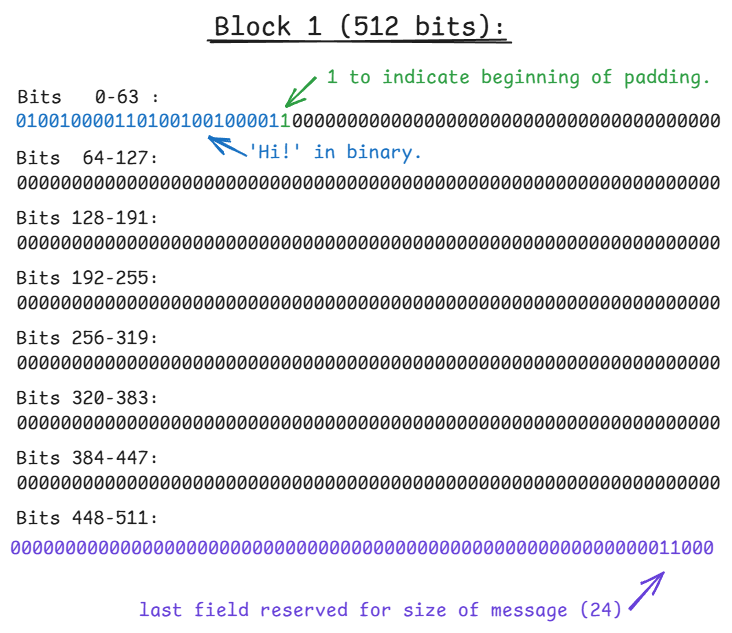

#### What happens if the message is longer than `'Hi!'` and the binary message takes up more than 512 bits?
In that case, the message would be expanded to several blocks, like so:

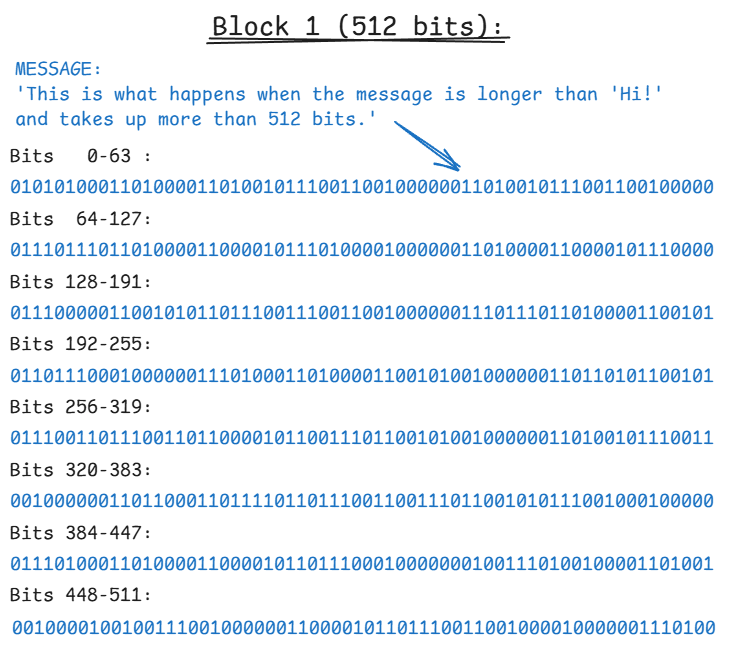
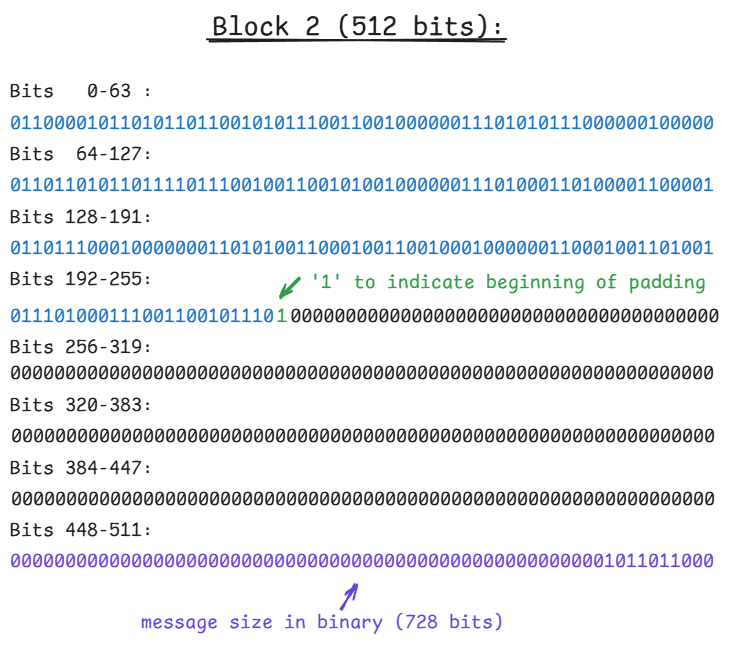

#### What happens if the message length is greater than 2^64 characters?
That would be more than 2 exobytes of data, and most implementations of SHA-256 would raise an error.

### Anyways, let's Code!
Let's pad the binary message according to the SHA-256 standard.



### Step 2.1: Add the '1' Bit
First, we simply append a '1' to our binary message:

In [13]:
padded_message = binary_message + '1'

### Step 2.2: Calculate Required Padding
Now we need to figure out how many zeros to add. And to do that, we need to remember a few things.

First, SHA-256 processes messages in 512-bit blocks.

In [14]:
BLOCK_SIZE = 512    # SHA-256 processes messages in 512-bit blocks

And there will always be *64 bits* reserved for the length field which comes at the **FINAL** block.

In [15]:
LENGTH_FIELD = 64   # Last 64 bits reserved for message length

So our final block length must be *448 bits*.

In [16]:
final_block_size = BLOCK_SIZE - LENGTH_FIELD
final_block_size

448

Remember, we only add zero padding to the *FINAL* block of the message. 

If the message is 900 bits for example, it will be structured like this:

- **BLOCK 1:** 512 bits allocated to Part I of message.
- **BLOCK 2** 
    - The final *388 bits* the of message
    - *1 bit* to indicate beginning of padding
    - *59 bits* of zeros
    - final *64 bits* to mark the message length
    - for a **TOTAL** of *512 bits*.

Considering this, we will use the modulo operator `%` to calculate how many zeros we need for the padding.

In the case of `Hi!` we need 423 zeros of padding.

In [17]:
padding_zeros = final_block_size - (len(padded_message) % BLOCK_SIZE)
padding_zeros

423


### Step 2.3: Add the Zero Padding
This is easy. We just add 423 zeros to our message.

In [18]:
print(f"BINARY MESSAGE: {binary_message}")
print(f"PADDED MESSAGE: {padded_message}")


BINARY MESSAGE: 010010000110100100100001
PADDED MESSAGE: 0100100001101001001000011


In [19]:
padded_message_with_zeros = padded_message + '0' * padding_zeros
print(f"PADDED MESSAGE WITH ZEROS: {padded_message_with_zeros}")

PADDED MESSAGE WITH ZEROS: 0100100001101001001000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000



### Step 2.4: Add the Length
Finally, add the original message length as a 64-bit number:

In [20]:
message_length = len(binary_message)

formatted_message_length = format(message_length, '064b')
print("FORMATTED MESSAGE LENGTH:", formatted_message_length)


FORMATTED MESSAGE LENGTH: 0000000000000000000000000000000000000000000000000000000000011000


### Step 2.5: Put it All Together.

In [21]:
#! Need to accound for longer blocks.

final_padded_block = padded_message_with_zeros + formatted_message_length
print("FINAL PADDED BLOCK:\n")

for bit in range(0, 512, 64):
    print(f"Bits {format(bit, '03d')} to {format(bit+64, '03d')}:", final_padded_block[bit:bit+64])


FINAL PADDED BLOCK:

Bits 000 to 064: 0100100001101001001000011000000000000000000000000000000000000000
Bits 064 to 128: 0000000000000000000000000000000000000000000000000000000000000000
Bits 128 to 192: 0000000000000000000000000000000000000000000000000000000000000000
Bits 192 to 256: 0000000000000000000000000000000000000000000000000000000000000000
Bits 256 to 320: 0000000000000000000000000000000000000000000000000000000000000000
Bits 320 to 384: 0000000000000000000000000000000000000000000000000000000000000000
Bits 384 to 448: 0000000000000000000000000000000000000000000000000000000000000000
Bits 448 to 512: 0000000000000000000000000000000000000000000000000000000000011000


### Everything at once
Here's the cleaner code that pads the binary message with the correct number of zeros and adds the length of the message at the end.

In [22]:
# Start with our message
message = "Hi!"

# 1. Convert to binary
binary = ''.join(format(ord(char), '08b') for char in message)

# 2. Add the '1' bit
padded = binary + '1'

# 3. Add padding zeros
zeros_needed = 448 - (len(padded) % 512)
if zeros_needed < 0:
    zeros_needed += 512
padded += '0' * zeros_needed

# 4. Add 64-bit message length
msg_length = len(binary)
length_bits = format(msg_length, '064b')
final_padded = padded + length_bits

print(f"Original message: {message}")
print(f"As binary: {binary}")
print(f"Length: {len(binary)} bits")

# Show complete blocks with formatting
print("\nComplete 512-bit block breakdown:")
blocks = [final_padded[i:i+512] for i in range(0, len(final_padded), 512)]
for i, block in enumerate(blocks):
    print(f"\nBlock {i+1} (512 bits):")
    print("=" * 100)
    # Print in rows of 64 bits for readability
    for j in range(0, 512, 64):
        row = block[j:j+64]
        print(f"Bits {j:>3}-{j+63:<3}: {row}")
    print("=" * 100)

Original message: Hi!
As binary: 010010000110100100100001
Length: 24 bits

Complete 512-bit block breakdown:

Block 1 (512 bits):
Bits   0-63 : 0100100001101001001000011000000000000000000000000000000000000000
Bits  64-127: 0000000000000000000000000000000000000000000000000000000000000000
Bits 128-191: 0000000000000000000000000000000000000000000000000000000000000000
Bits 192-255: 0000000000000000000000000000000000000000000000000000000000000000
Bits 256-319: 0000000000000000000000000000000000000000000000000000000000000000
Bits 320-383: 0000000000000000000000000000000000000000000000000000000000000000
Bits 384-447: 0000000000000000000000000000000000000000000000000000000000000000
Bits 448-511: 0000000000000000000000000000000000000000000000000000000000011000


### Padding Message Function
Now we will refactor this into a function.

In [23]:
def pad_binary(binary_message,
               block_size=512,
               length_field=64):

    # Add the '1' bit
    padded = binary_message + '1'

    # Calculate Zeros Needed
    msg_size_on_final_block = (len(padded) % BLOCK_SIZE)
    zeros_needed = block_size - msg_size_on_final_block - length_field

    # If there are not enough zeros, add another block w/ zeros
    if zeros_needed < 0:
        zeros_needed += 512
    
    # Otherwise, appen the zeros needed
    padded += '0' * zeros_needed

    # Add 64-bit message length to the end, padded with zeros
    msg_length = len(binary)
    length_bits = format(msg_length, '064b')
    final_padded = padded + length_bits

    return final_padded

pad_binary(binary)

'01001000011010010010000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000'

With this `visualize_blocks()` function we can visualize the structure.

In [24]:
def visualize_blocks(binary_message, block_size=512):
    blocks = [binary_message[i:i+block_size] for i in range(0, len(binary_message), block_size)]
    for i, block in enumerate(blocks):
        print(f"\nBlock {i+1} ({block_size} bits):")
        print("=" * 100)
        # Print in rows of 64 bits for readability
        for j in range(0, block_size, 64):
            row = block[j:j+64]
            print(f"Bits {j:>3}-{j+63:<3}: {row}")
        print("=" * 100)

visualize_blocks(final_padded)


Block 1 (512 bits):
Bits   0-63 : 0100100001101001001000011000000000000000000000000000000000000000
Bits  64-127: 0000000000000000000000000000000000000000000000000000000000000000
Bits 128-191: 0000000000000000000000000000000000000000000000000000000000000000
Bits 192-255: 0000000000000000000000000000000000000000000000000000000000000000
Bits 256-319: 0000000000000000000000000000000000000000000000000000000000000000
Bits 320-383: 0000000000000000000000000000000000000000000000000000000000000000
Bits 384-447: 0000000000000000000000000000000000000000000000000000000000000000
Bits 448-511: 0000000000000000000000000000000000000000000000000000000000011000


# Step 3

### Recap

Our original message.

In [25]:
sha_256_input = 'Hi!'
sha_256_input

'Hi!'

Message transformed to binary.

In [26]:
binary_message = text_to_binary(sha_256_input)
binary_message

'010010000110100100100001'

Then we pad the message with zeros, adding
- `1` to indicate the beginning of padding
- enough zeros `000000...` to make the padded message length a multiple of 512 *(512, 1024, 2056, etc.)*
- and a final 64-bit field indicating the length of the message in binary.

In [27]:
padded_message = pad_binary(binary_message)
padded_message

print(f"PADDED MESSAGE: {padded_message}")
print(f"LENGTH {len(padded_message)}")
print(f"MULTIPLE OF 512? {len(padded_message) % 512 == 0}")


PADDED MESSAGE: 01001000011010010010000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000
LENGTH 512
MULTIPLE OF 512? True


Visualized like this:

In [28]:
visualize_blocks(padded_message)


Block 1 (512 bits):
Bits   0-63 : 0100100001101001001000011000000000000000000000000000000000000000
Bits  64-127: 0000000000000000000000000000000000000000000000000000000000000000
Bits 128-191: 0000000000000000000000000000000000000000000000000000000000000000
Bits 192-255: 0000000000000000000000000000000000000000000000000000000000000000
Bits 256-319: 0000000000000000000000000000000000000000000000000000000000000000
Bits 320-383: 0000000000000000000000000000000000000000000000000000000000000000
Bits 384-447: 0000000000000000000000000000000000000000000000000000000000000000
Bits 448-511: 0000000000000000000000000000000000000000000000000000000000011000


### [Whatever the next step is.]

### Initialize Hash Values
To begin the crytographic transformation of the message, we're going to need eight 'magic numbers': constants written in hexidecimal form that are simply part of the SHA-256 algorithm, designated `H[0]` to `H[7]`

In [29]:
H = [
    0x6a09e667,
    0xbb67ae85,
    0x3c6ef372,
    0xa54ff53a,
    0x510e527f,
    0x9b05688c,
    0x1f83d9ab,
    0x5be0cd19
]

### Where did these numbers come from?

Let's get these hash values from first principles. First, the `H` values derive from prime numbers.

In [30]:
H_prime = [2, 3, 5, 7, 11, 13, 17, 19]

Then we need to do the following operations on each of the prime numbers:
- calculate the square root `(2 ➡ 1.4142135623730951)`
- extract the fractional part of the square root `(1.4142135623730951 ➡ 0.4142135623730951)`
- multiply the fractional part by 2^32 to scale it up to a 32-bit integer `(0.4142135623730951 ➡ 1779033703.9520998)`
- then convert it to an integer `(1779033703.9520998 ➡ 1779033703)`
- then convert it to hexidecimal `(1779033703 ➡ 0x6a09e667)`

calculate the square root. We're gonna need the `math` module for this.

In [31]:
import math

def get_fractional_part_as_32bit_int(number):
    """
    Calculate the 32-bit integer representation of the fractional part of the square root of a number.
    
    Args:
    number (int): The number to calculate the square root of.
    
    Returns:
    int: The 32-bit integer representation of the fractional part.
    """
    # Calculate the square root of the number
    sqrt_value = math.sqrt(number)
    
    # Extract the fractional part
    fractional_part = sqrt_value - int(sqrt_value)
    
    # Multiply the fractional part by 2^32 and convert to integer
    result = int(fractional_part * (2**32))
    
    return result

# First eight prime numbers
H_prime = [2, 3, 5, 7, 11, 13, 17, 19]

# Calculate the fractional parts and convert to 32-bit integers
H_fractional_part = [get_fractional_part_as_32bit_int(num) for num in H_prime]

# Convert the results to hexadecimal format for readability
H_fractional_part_hex = [hex(num) for num in H_fractional_part]

# Print the results
H_fractional_part_hex


['0x6a09e667',
 '0xbb67ae85',
 '0x3c6ef372',
 '0xa54ff53a',
 '0x510e527f',
 '0x9b05688c',
 '0x1f83d9ab',
 '0x5be0cd19']

As we can see, these hex values are the same as the ones initialized at the beginning of the section.

In [32]:
Original_H_Values = [int(num) for num in H]
Derived_H_Values = [int(hex_num, 16) for hex_num in H_fractional_part_hex]
print("THEY'RE THE SAME:", Original_H_Values == Derived_H_Values)

THEY'RE THE SAME: True


In [33]:
H == H_fractional_part

True

### Step 3.2: Prepare the Message Schedule

**Bit Shifting and Rotation Explained**

SHA-256 requires us to understand two operations: *bit shifting* and *bit rotating*.

Here is the 32-bit representation of 9 (`1001`):

`00000000000000000000000000001001`

A **RIGHT SHIFT** of 3 means the bits are pushed three places to the right, with the tail `001` being knocked off. Zeros are filled in on the left:

`00000000000000000000000000000001`

However, a **RIGHT ROTATE** of 3 results in the tail `001` being reintroduced on the left-hand side:

`00100000000000000000000000000010`

This reintroduces the bits that were shifted out on the right back to the left.

`visualize_shift_and_rotate()`


Play with this function to see the difference between shift and rotate using different values.

In [50]:
def to_binary_str(value):
    """Convert an integer to a 32-bit binary string."""
    return f"{value:032b}"

def right_shift(value, shift):
    """Right shift a 32-bit integer value by shift bits."""
    return value >> shift

def right_rotate(value, shift):
    """Right rotate a 32-bit integer value by shift bits."""
    return (value >> shift) | (value << (32 - shift)) & 0xFFFFFFFF

def visualize_shift_and_rotate(value, shift):
    print(f"Original value: {to_binary_str(value)}")
    
    shifted_value = right_shift(value, shift)
    print(f"Right shift by {shift}: {to_binary_str(shifted_value)}")
    
    rotated_value = right_rotate(value, shift)
    print(f"Right rotate by {shift}: {to_binary_str(rotated_value)}")

# Example usage
value = 100  # 00000000000000000000000000000100
shift = 3

visualize_shift_and_rotate(value, shift)

Original value: 00000000000000000000000001100100
Right shift by 3: 00000000000000000000000000001100
Right rotate by 3: 10000000000000000000000000001100


`rightrotate()`

So let's make a right rotate function from scratch.

In [35]:
def rightrotate(value, shift):
    """Right rotate a 32-bit integer value by shift bits."""
    return (value >> shift) | (value << (32 - shift)) & 0xFFFFFFFF

rightrotate(1, 2)

1073741824

In [ ]:

def prepare_message_schedule(padded_message):
    # Split the padded message into 512-bit blocks
    blocks = [padded_message[i:i+512] for i in range(0, len(padded_message), 512)]
    
    # Initialize the message schedule array
    message_schedule = []

    for block in blocks:
        # Initialize the array W with the first 16 words
        W = [int(block[i:i+32], 2) for i in range(0, 512, 32)]
        
        # Extend the first 16 words into the remaining 48 words
        for t in range(16, 64):
            s0 = rightrotate(W[t-15], 7) ^ rightrotate(W[t-15], 18) ^ (W[t-15] >> 3)
            s1 = rightrotate(W[t-2], 17) ^ rightrotate(W[t-2], 19) ^ (W[t-2] >> 10)
            W.append((W[t-16] + s0 + W[t-7] + s1) & 0xFFFFFFFF)
        
        message_schedule.append(W)
    
    return message_schedule

# Prepare the message schedule for the padded message
message_schedule = prepare_message_schedule(padded_message)

# Print the first block's message schedule for verification
for i, word in enumerate(message_schedule[0]):
    print(f"W[{i:02}]: {word:032b}")

H_prime = [
    2
]